In [31]:
#Import
import matplotlib.pyplot as plt
import numpy as np
import math

radial velocities, transits, astrometry, microlensing, and pulsar timing

semi-major axis vs Mass

## Radial Velocity

1. Formula of Amplitude of Signal (minimum mass): 

$\dfrac{M_p}{{(M_p + M_*)}^{2/3}} = K_*\sqrt{1 - e^2} {(\dfrac{P}{2\pi G})}^{1/3}$


 $M_p = 4.919*10^{-3} * 365^2 K (1-e^2)^{1/2} a^{1/2} M_*^{2/3}$, we assume $K = 3*10^{-4}km/s,$ $e = 1,$ $M_* = solar   mass$
 
 $M_p = 4.919*10^{-3} * 365^2 K a^{1/2}$
 
2. Survey Name: HARPS, EXPRES

3. Type of Equipment: Extremely stable spectrograph

4. Duration: HARPSE has been in operation since 2003 and is still in use today, detected 150+ exoplanets. Usually RV surveys observe a target star over a period of several months to several years in order to obtain multiple measurements of its radial velocity.

5. Number and Type of Star: Radial velocity surveys are more sensitive to more massive planets, and planets around low mass star. This method also favours the detection of planetary orbits coplanar with the line of sight.

6. limiting signal strength: The limiting signal strength of the HARPS survey is around 1 meter per second, which is the level of precision needed to detect the small Doppler shifts caused by Earth-sized planets orbiting Sun-like stars. The survey is sensitive to planets with periods of up to several years and can detect planets with masses as low as a few Earth masses. (I used 30cm/s in the real calculation)


7. Bias from number to frequency: planets with lower eccentricity (e >= 0.6) are under-represented, and according to Cumming 2004, there's a differernt of detection threshold for longer survey period and shorter survey period. Also, the survey is biased towards detecting planets with short orbital periods because they cause larger Doppler shifts.

In [3]:
def radial_func(a):
    return 4.919e-3* 365**2 *3e-4 *a**0.5

In [40]:
def kepler_third_a(T, M = 1): #T in yr
    return (T**2 * M)**(1/3)
def kepler_third_t(a, M=1):
    return (a**3/M)**0.5

In [75]:
As = np.arange(0, 10e3) #in AU

## Transit

1. Formula of Amplitude of Signal:

$S/N = (nt)^{1/2}$ (t is the transit duration and n is the number of transits which equals the mission life divided by the orbital period)

$\delta = \dfrac{R_p}{R_*}^2 \propto (S/N)^{-1}$


2. Survey Name: Kepler's Mission, WASP

3. Type of Equipment: Wide-field telescope is required to monitor the brightness of a large number of stars over long periods. Smaller Aperture telescope will also work fine. 

4. Duration: There're two kinds of surveys in total: all-sky survey (revisiting targets), and small angular area with relatively deep exposures (composed of field stars and clusters) A ground-based survey would most likely observe a star at random times throughout a project, and space telescope will observe a star in pairs of observations separated by minutes (according to Pepper 2003). The duration of kepler mission in total is 3.5 year.

5. Number and Type of Star: This techniques favours planet with smaller orbits/semi-major axis, larger radius

6. limiting signal strength: Transit detection is not sensitive to planets with periods longer than T/3 of the survey duration T because at least 3 transits are required to determine existence of a planet

7. Bias from number to frequency: there's a bias favours planet with smalle period and large radius which is actually rare. Transit probability also comes into play





In [67]:
# I use 1/3 duration of kepler mission (3.5 yr as upper limit) of planet orbitting period as the cut-off on semi-major axis
# Assume star property just like sun
# planet mass 
jup_den, jup_rad = 1326, 69911 #kg/m^3, km
ear_den, ear_rad = 5520, 6371
sun_rad = 695700 #km
print(f"the cut-off semi-major axis is {kepler_third_a(3.5/3)} AU") 
m_jup = 1.89813e27 #kg
# Calculate mass limit with photon limit of 10^16, S/N = 3σ
def mass_limit(a, Rs): 
    T = kepler_third_t(a)
    ratio = np.sqrt(3.5/T) #ratio decrease with larger a/T with fix noise 
    print(ratio)
    depth = 1/ratio #depth increase
    print(depth)
    Rp = np.sqrt(depth)*Rs*1000 #in m
    print(Rp)
    m = jup_den * (4/3 * math.pi * Rp**3)/1e4
    #print(m/(1.899e27))
    return m/m_jup
    

mass_limit(1e6, sun_rad)


the cut-off semi-major axis is 1.1082332935251626 AU
5.916079783099616e-05
16903.08509457033
90449254624.42213


216531.53613514962

## Astrometry

1. Formula of Amplitude of Signal $ \alpha = \dfrac{M_p}{M_*} \dfrac{a}{d}$ in arcsec
, $ M_p = \dfrac{\alpha M_* d}{3*10^{-5} a } $ in Earth mass

2. Survey Name: GAIA, SIM

3. Type of Equipment: Two Space telescope with a primary mirror about 1.45 meters in diameter. The telescopes are separated by a fixed angle of 106.5 degrees, which allows Gaia to observe the same region of sky from two different points. Gaia is equipped with a large focal plane array consisting of over 100 CCD detectors.

4. Duration: Gaia has been launched for 7.5 years.

5. Number and Type of Star: More sensitive to more massive planets, as well as planets on longer period orbits, but this relationship doesn't holded for planet with period larger than survey duration

6. limiting signal strength: Gaia's astrometric measurements have a precision of up to 20 microarcseconds, making it capable of detecting exoplanets with masses as low as a few Earth masses and orbits out to several astronomical units from their host stars.

7. Bias from number to frequency: Gia is more sensitive to planets with larger masses and orbits closer to their host stars. This is because the astrometric signal decreases with increasing distance from the star and decreasing planet mass. There's also a selection bias towards nearby and bright stars.


In [104]:
def astrometry_func(a): 
    #I assume the star is the same as the sun, deepest distance Gaia can see as 50000 light year (15337.4 pc)
    # angular size that Gaia can detect as 20 microas
    return 2e-5 * 1533.74 / (a*3e-4)


## Microlensing

1. Formula of Amplitude of Signal: I wasn't be able to figure out the planet mass - semi-major axis relationship, so directly applied a formula from simulation of WFIRST survey:

$M_p = exp(-3.9 - 1.15log(a) + 3.56 \sqrt{0.783^2 + (log(a)- 0.356)^2})$

2. Survey Name: WFIRST

3. Type of Equipment: near-infrared telescope, small field of view with wide filter; larger-diameter mirrors good at   measuring relative lens–source proper motions.

4. Duration: twice per year because most lensing event concentrate around galactic bulge. Observing cadence of ∼15 min is required because deviation and Einstein radius must be sampled by several datapoints. In the end: 72 continuous days of observations occurring around vernal and autumnal equinoxes.

5. Number and Type of Star: Microlensing give us a general sense of the distribution of all kinds of planets (1-10AU with below ~30 Earth Mass comparing to Astrometry) and stars, particularly it also detects planets that are far away from the star (beyond snow line).Space-based transit surveys in particular can detect small & low-mass planets, but is required to observe for a long time. This method help finding habitable planets in other word.

6. limiting signal strength

7. Bias from number to frequency: Microlensing events are relatively rare and occur unpredictably, and are most sensitive to planets that are orbiting low-mass stars because they produce larger microlensing signals than planets orbiting higher-mass stars. As discussed in class, there might also be a degeneracies in the modeling of the microlensing light curve, which can lead to multiple possible solutions for the parameters of the system. This can lead to a bias in favor of detecting certain types of planetary systems over others.

In [161]:
def micro_func(a):
    return np.exp(-3.9 - 1.15*np.log(a) + 3.56*np.sqrt(0.783**2 + (np.log(a) - 0.356)**2))

## Pulsar Timing

1. Formula of Amplitude of Signal (According to the figure of planets detected by all kinds of method, there seems to be a wide range of semi-major axis of Pulsar timing accross the region of all methods, so I didn't add much limit to it)

$\tau = \dfrac{1}{c} \dfrac{a sini M_p}{M_*}$

2. Survey Name: EPTA

3. Type of Equipment: A network of ground telescopes are used including 76-m Lovell Telescope at Jodrell Bank Observatory in the UK, the 100-m Effelsberg Radio Telescope in Germany, the 32-m Medicina Radio Telescope in Italy, the 64-m Parkes Radio Telescope in Australia, and the 100-m Green Bank Telescope in the USA.

4. Duration: The EPTA has been ongoing since 2006 and is a long-term project

5. Number and Type of Star: The survey targets a large number of pulsars (around 50-70) that are known to be stable and have high timing precision. These pulsars are typically millisecond pulsars and are rapidly rotating neutron stars that emit regular radio pulses. Planets that are more massive are also favoured.

6. limiting signal strength: The EPTA is sensitive to gravitational waves with strains of around 10^-15 or lower.

7. Bias from number to frequency: planet got detected from pulser themselves are extremely rare and cannot be used as a common representative of the planet population. There's also sin i dgeneracy.

In [113]:
def pul_func(a): #assume the limit of EPTA to be 100 nano second, mass of star = solar mass
    return 10e-7 * 3e8 * a 

[5.91607978e+07 1.87082869e+00 1.11240140e+00 ... 1.87124974e-03
 1.87110937e-03 1.87096902e-03]
[1.69030851e-08 5.34522484e-01 8.98956081e-01 ... 5.34402212e+02
 5.34442303e+02 5.34482394e+02]
[9.04492546e+04 5.08633537e+08 6.59616090e+08 ... 1.60825950e+10
 1.60831983e+10 1.60838015e+10]


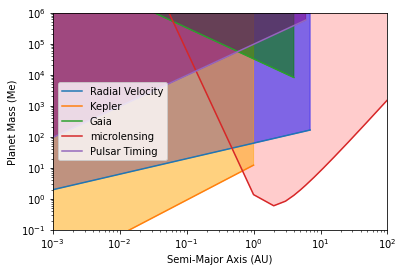

In [164]:
As = np.arange(1e-10, 10e3) #in AU
M_e = 5.97219e24

m_mass = micro_func(As)*m_jup/M_e
upper_limit = [10**6 for _ in range(m_mass.shape[0])]
plt.fill_between(As, m_mass, upper_limit, color='red', alpha=0.2)

radial_mass = radial_func(As)[As < kepler_third_a(20)]*m_jup/M_e #limit of radial velocity method as 20 years
radial_a = As[As < kepler_third_a(20)]
plt.loglog(radial_a, radial_mass)
upper_limit = [10**6 for _ in range(radial_a.shape[0])]
plt.fill_between(radial_a, radial_mass, upper_limit, color='blue', alpha=0.5)

transit_mass = mass_limit(As, sun_rad)[As < kepler_third_a(3.5/3)]*m_jup/M_e
transit_a = As[As < kepler_third_a(3.5/3)]
plt.loglog(transit_a, transit_mass)
upper_limit = [10**6 for _ in range(transit_a.shape[0])]
plt.fill_between(transit_a, transit_mass, upper_limit, color='orange', alpha=0.5)

astro_mass = astrometry_func(As)[As < kepler_third_a(10)]*m_jup/M_e
astro_as = As[As < kepler_third_a(10)]
plt.loglog(astro_as, astro_mass)
upper_limit = [10**6 for _ in range(astro_mass.shape[0])]
plt.fill_between(astro_as, astro_mass, upper_limit, color='green', alpha=0.6)

plt.loglog(As, m_mass)

pul_mass = pul_func(As)[As < kepler_third_a(17)]*m_jup/M_e
pul_as = As[As < kepler_third_a(17)]
plt.loglog(pul_as, pul_mass)
upper_limit = [10**6 for _ in range(pul_mass.shape[0])]
plt.fill_between(pul_as, pul_mass, upper_limit, color='purple', alpha=0.5)

plt.xlim(1e-3, 100)
plt.ylim(0.1, 10**6)

plt.xlabel("Semi-Major Axis (AU)")
plt.ylabel("Planet Mass (Me)")

strs = ["Radial Velocity", "Kepler", "Gaia", "microlensing", "Pulsar Timing"]
plt.gca().legend((strs))

Observation: The microlensing technique seems to cover the largest part of the region, while comparing to other methods it's less stable and reliable. Pulsar timing is the second largest one with similar drawbacks as microlensing. Gaia (Astrometry) vs RV & Transit cover differernt planet mass region and are complement of each other. Astrometry has an inverse trend comparing to all other methods.